In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
tf.test.gpu_device_name()
import pickle

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWibA2ppvJc21kNMHcJH3L3hQFajYAWn637EeabVFEAEJRI_mziRuSg
Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/prudent.ai/task1/books.csv", error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
real_df = df.copy()

In [5]:
df.value_counts("bookID").size

11123

In [6]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
df.columns = ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher']

In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Number of reviews containing rating less than 3.5: 733


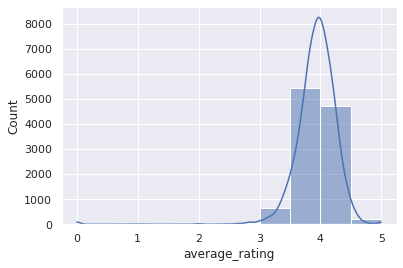

In [ ]:
# average_rating bars
# might contain too much good reviews(>3.5)
print("Number of reviews containing rating less than 3.5:", df[df["average_rating"]<3.5]["bookID"].size)
# good no of pages diversity
# for some book we might have no text_reviews which is obvious because people like to give star ratings instead of writing
sns.histplot(df["average_rating"], binwidth=0.5, kde=True)

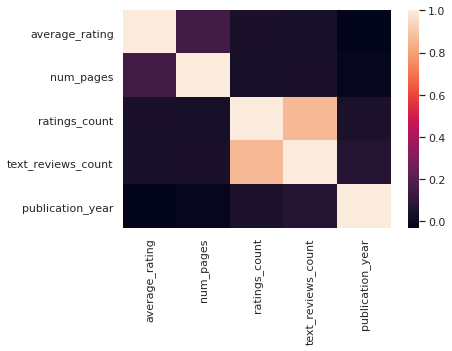

In [ ]:
sns.heatmap(df.corr())

list
    *
    *

In [ ]:
# no collinearity in features, so no redundancy

In [ ]:
print("no of books by each top 5 publisher: ")
df.value_counts(df["publisher"]).head()

no of books by each top 5 publisher: 


publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
dtype: int64

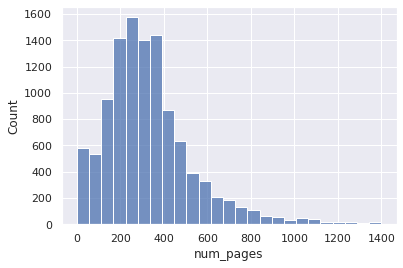

In [ ]:
sns.displot(kind="hist", x="num_pages", data=df, bins=25, common_bins=False, stat="count", binrange=(0,1400))



1.   More number of books have pages around 200-400
2.   Some books also have pages more than 1500



# **Data** **Transformations**

**Dropping Features**

In [9]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


*Title* can be intrepreted in two ways


*   Categorical Data

Considering *title* as categorical data, it becomes unique for a each row in the table, which will not give any inference or property about the book. So dropping the *title* is a better option.
*   Textual Data

Cosidering *title* as Textual Data, we will need to use Vectorization for the each *title* which increases the number of features to **20289**. This might not be feasible to handle such number of features while training as well as inferencing. So again *title* can be dropped instead.



<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


([<matplotlib.axis.XTick at 0x7f0e63e18fd0>,
 [Text(-0.2, 0, 'multiple books authors'),
  Text(0.0, 0, 'single book authors')])

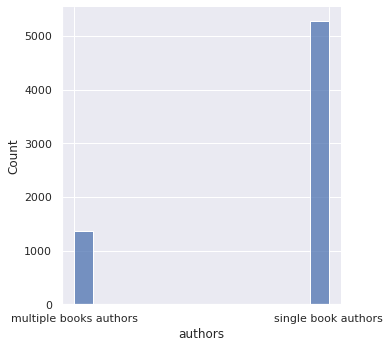

In [ ]:
sns.displot(kind="hist", data=(df["authors"].value_counts()==1))
plt.xticks(ticks=[0,1], labels=("multiple books authors", "single book authors"))


# why dropping **authors** ?

*   There are more single book author than authors who have written multiple books. So **authors** do not tell much about the books in this dataset.

*  Including **authors** as a categorical feature increases number of features to 6000+.

So dropping **authors** is a good decission.



In [10]:
df.drop(["isbn13","bookID", "title", "authors"], inplace=True, axis=1)

In [19]:
df.head()

,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
0,1.814493,0439785960,eng,652,18.469833,10.498316,Scholastic Inc.,0.707055
1,1.586228,0439358078,eng,870,18.980766,11.130957,Scholastic Inc.,0.464538
2,1.386496,0439554896,eng,352,-0.103204,-0.115679,Scholastic,0.343280
3,1.785960,043965548X,eng,435,20.637902,13.888182,Scholastic Inc.,0.464538
4,2.413689,0439682584,eng,2690,0.208768,-0.146729,Scholastic,0.464538


In [ ]:
df.loc[0]

average_rating                   4.57
language_code                     eng
num_pages                         652
ratings_count                 2095690
text_reviews_count              27591
publication_date            9/16/2006
publisher             Scholastic Inc.
Name: 0, dtype: object

In [12]:
def convert_date(date_list):
    return int(date_list[-1])

In [13]:
df["publication_date"] = df["publication_date"].str.split("/")

In [14]:
df["publication_year"] = df["publication_date"].apply(convert_date)

In [15]:
df.drop("publication_date", axis=1, inplace=True)

**Feature Scaling**

In [45]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
df[["average_rating", "ratings_count", "text_reviews_count", "publication_year", "num_pages"]] = sc.fit_transform(df[["average_rating", "ratings_count", "text_reviews_count", "publication_year", "num_pages"]])

In [46]:
df.head()

,isbn,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
0,0439785960,1.814493,eng,1.308751,18.469833,10.498316,Scholastic Inc.,0.707055
1,0439358078,1.586228,eng,2.212783,18.980766,11.130957,Scholastic Inc.,0.464538
2,0439554896,1.386496,eng,0.064669,-0.103204,-0.115679,Scholastic,0.343280
3,043965548X,1.785960,eng,0.408865,20.637902,13.888182,Scholastic Inc.,0.464538
4,0439682584,2.413689,eng,9.760210,0.208768,-0.146729,Scholastic,0.464538


**Categorical Values**

In [24]:
df = df.iloc[:, [1,0, 2,3,4,5,6,7]]

In [55]:
df.head()

,isbn,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
0,0439785960,1.814493,eng,1.308751,18.469833,10.498316,Scholastic Inc.,0.707055
1,0439358078,1.586228,eng,2.212783,18.980766,11.130957,Scholastic Inc.,0.464538
2,0439554896,1.386496,eng,0.064669,-0.103204,-0.115679,Scholastic,0.343280
3,043965548X,1.785960,eng,0.408865,20.637902,13.888182,Scholastic Inc.,0.464538
4,0439682584,2.413689,eng,9.760210,0.208768,-0.146729,Scholastic,0.464538


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x_train = df.iloc[:, 1:]
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), ["language_code", "publisher"])], remainder="passthrough")
x_train = ct.fit_transform(x_train).toarray()

**Converting to Numpy**

# Creating Model

In [57]:
from sklearn.cluster import KMeans
inertia_data = []
for i in range(5, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(x_train)
    print(i, clf.inertia_)
    inertia_data.append([i,clf.inertia_])

5 40956.36033286036
6 37363.15781993966
7 34582.80067226961
8 32932.77874741674
9 31372.438792955683


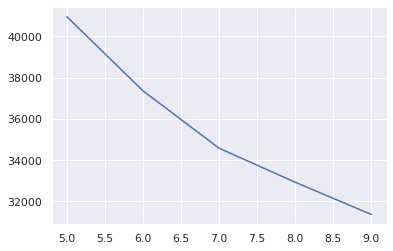

In [58]:
data = np.array(inertia_data)
sns.lineplot(x=data[:, 0], y=data[:, 1])

**model with selected cluster number**

In [59]:
clf = KMeans(n_clusters=7)
prediction = clf.fit_predict(x_train)

In [60]:
real_df["class_labels"] = prediction

In [61]:
real_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,class_labels
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,3
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,3
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4


(0.0, 2000.0)

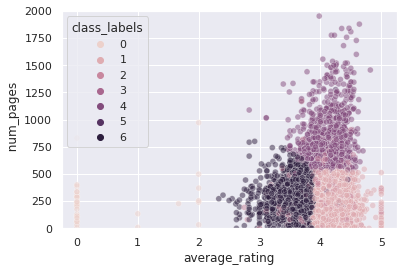

In [110]:
sns.scatterplot(x=real_df["average_rating"], y=real_df["  num_pages"], hue=real_df["class_labels"], alpha=0.5)
plt.ylim((0, 2000))

In [111]:
real_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,class_labels
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,3
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,3
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4


In [64]:
real_df.to_csv("output.csv")

In [138]:
class Recommender:
    def __init__(self, path=""):
        self.df = pd.read_csv(path+"output.csv")
    def recommend(self, isbn):
        class_label = self.df.loc[self.df["isbn"]==isbn,"class_labels"].values[0]
        cluster_movies = self.df.loc[(self.df["class_labels"]==class_label)&(self.df["isbn"]!=isbn), "title"].values[:10]
        return cluster_movies


In [139]:
recommender = Recommender()
movies = recommender.recommend("0439358078")
print(movies)

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
 'The Fellowship of the Ring (The Lord of the Rings  #1)' 'The Alchemist'
 'Of Mice and Men' 'Memoirs of a Geisha'
 'Angels & Demons (Robert Langdon  #1)'
 'The Da Vinci Code (Robert Langdon  #2)'
 'The Curious Incident of the Dog in the Night-Time' 'Little Women']
